# Problem Statment

>A education company named <b>X Education</b> sells online courses to industry professionals.

>Now, the company wants to find promising leads, i.e. the leads that are most likely to convert into customers.For that we need to build a model where we need to assign a lead score to each of the leads such that the customers with a higher lead score have a higher conversion chance and the customers with a lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

# Objective of the case study

> Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.


In [175]:
# Importing Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats
import statsmodels.api as sm

from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics

from sklearn.metrics import precision_score, recall_score

from sklearn.metrics import precision_recall_curve


import warnings
warnings.filterwarnings("ignore")


In [3]:
# Importing Data 

df = pd.read_csv("Leads.csv")
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
# Checking the size of dataset

df.shape

(9240, 37)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [6]:
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


# Data Cleaning

In [7]:
df.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [8]:
# Joining the spaces in column names with hash

df.columns = ['_'.join(name.lower().split()) for name in df.columns]

In [9]:
df.columns

Index(['prospect_id', 'lead_number', 'lead_origin', 'lead_source',
       'do_not_email', 'do_not_call', 'converted', 'totalvisits',
       'total_time_spent_on_website', 'page_views_per_visit', 'last_activity',
       'country', 'specialization', 'how_did_you_hear_about_x_education',
       'what_is_your_current_occupation',
       'what_matters_most_to_you_in_choosing_a_course', 'search', 'magazine',
       'newspaper_article', 'x_education_forums', 'newspaper',
       'digital_advertisement', 'through_recommendations',
       'receive_more_updates_about_our_courses', 'tags', 'lead_quality',
       'update_me_on_supply_chain_content', 'get_updates_on_dm_content',
       'lead_profile', 'city', 'asymmetrique_activity_index',
       'asymmetrique_profile_index', 'asymmetrique_activity_score',
       'asymmetrique_profile_score',
       'i_agree_to_pay_the_amount_through_cheque',
       'a_free_copy_of_mastering_the_interview', 'last_notable_activity'],
      dtype='object')

In [10]:
# Looking at the unique values in each column 

for column in df.columns[2:]:
    print(column, end = '-->  ')
    print(df[column].unique())
    print()

lead_origin-->  ['API' 'Landing Page Submission' 'Lead Add Form' 'Lead Import'
 'Quick Add Form']

lead_source-->  ['Olark Chat' 'Organic Search' 'Direct Traffic' 'Google' 'Referral Sites'
 'Welingak Website' 'Reference' 'google' 'Facebook' nan 'blog'
 'Pay per Click Ads' 'bing' 'Social Media' 'WeLearn' 'Click2call'
 'Live Chat' 'welearnblog_Home' 'youtubechannel' 'testone' 'Press_Release'
 'NC_EDM']

do_not_email-->  ['No' 'Yes']

do_not_call-->  ['No' 'Yes']

converted-->  [0 1]

totalvisits-->  [  0.   5.   2.   1.   4.   8.  11.   6.   3.   7.  13.  17.  nan   9.
  12.  10.  16.  14.  21.  15.  22.  19.  18.  20.  43.  30.  23.  55.
 141.  25.  27.  29.  24.  28.  26.  74.  41.  54. 115. 251.  32.  42.]

total_time_spent_on_website-->  [   0  674 1532 ...  603  483  927]

page_views_per_visit-->  [ 0.    2.5   2.    1.    4.    8.    2.67 11.    5.    6.    3.    1.33
  1.5   3.5   7.    2.33 13.    8.5   5.5   1.67   nan  4.5   3.33 16.
 12.    1.71  1.8   6.5   4.33 14.    3.4  1

### As we can see some columns have 'select' also as a value , so we need to replace it with nan
 ### And before that we need to convert all values to lower case 

In [11]:
df= df.applymap(lambda x : x.lower() if type(x) == str else x)

In [12]:
# Joining categorical column values with hash 

categorical_col = df.select_dtypes(include=['object']).columns
df[categorical_col] = df[categorical_col].apply(lambda x:x.str.lower().str.replace(' ' , '_').str.strip())

In [13]:
df = df.replace('select' , np.nan)

In [14]:
df.how_did_you_hear_about_x_education

0                 NaN
1                 NaN
2                 NaN
3       word_of_mouth
4               other
            ...      
9235              NaN
9236              NaN
9237              NaN
9238    online_search
9239              NaN
Name: how_did_you_hear_about_x_education, Length: 9240, dtype: object

In [15]:
# Checking for unique value counts in each column 

df.nunique()



prospect_id                                      9240
lead_number                                      9240
lead_origin                                         5
lead_source                                        20
do_not_email                                        2
do_not_call                                         2
converted                                           2
totalvisits                                        41
total_time_spent_on_website                      1731
page_views_per_visit                              114
last_activity                                      17
country                                            38
specialization                                     18
how_did_you_hear_about_x_education                  9
what_is_your_current_occupation                     6
what_matters_most_to_you_in_choosing_a_course       3
search                                              2
magazine                                            1
newspaper_article           

In [16]:
# Dropping column with unique valued

df_1 = df.drop(['magazine', 'receive_more_updates_about_our_courses' ,'update_me_on_supply_chain_content' , 'get_updates_on_dm_content' , 'i_agree_to_pay_the_amount_through_cheque'] , axis=1)

In [17]:
df_1.nunique()

prospect_id                                      9240
lead_number                                      9240
lead_origin                                         5
lead_source                                        20
do_not_email                                        2
do_not_call                                         2
converted                                           2
totalvisits                                        41
total_time_spent_on_website                      1731
page_views_per_visit                              114
last_activity                                      17
country                                            38
specialization                                     18
how_did_you_hear_about_x_education                  9
what_is_your_current_occupation                     6
what_matters_most_to_you_in_choosing_a_course       3
search                                              2
newspaper_article                                   2
x_education_forums          

In [18]:
df.tags.value_counts()

will_revert_after_reading_the_email                  2072
ringing                                              1203
interested_in_other_courses                           513
already_a_student                                     465
closed_by_horizzon                                    358
switched_off                                          240
busy                                                  186
lost_to_eins                                          175
not_doing_further_education                           145
interested__in_full_time_mba                          117
graduation_in_progress                                111
invalid_number                                         83
diploma_holder_(not_eligible)                          63
wrong_number_given                                     47
opp_hangup                                             33
number_not_provided                                    27
in_touch_with_eins                                     12
lost_to_others

In [19]:
df.last_activity.value_counts()

email_opened                    3437
sms_sent                        2745
olark_chat_conversation          973
page_visited_on_website          640
converted_to_lead                428
email_bounced                    326
email_link_clicked               267
form_submitted_on_website        116
unreachable                       93
unsubscribed                      61
had_a_phone_conversation          30
approached_upfront                 9
view_in_browser_link_clicked       6
email_received                     2
email_marked_spam                  2
visited_booth_in_tradeshow         1
resubscribed_to_emails             1
Name: last_activity, dtype: int64

In [20]:
# Removing columns which are of less use 

df_1 = df_1.drop(['prospect_id' , 'lead_number' , 'last_activity'] , axis=1)

In [21]:
df_1.head()

,lead_origin,lead_source,do_not_email,do_not_call,converted,totalvisits,total_time_spent_on_website,page_views_per_visit,country,specialization,...,tags,lead_quality,lead_profile,city,asymmetrique_activity_index,asymmetrique_profile_index,asymmetrique_activity_score,asymmetrique_profile_score,a_free_copy_of_mastering_the_interview,last_notable_activity
0,api,olark_chat,no,no,0,0.0,0,0.0,NaN,NaN,...,interested_in_other_courses,low_in_relevance,NaN,NaN,02.medium,02.medium,15.0,15.0,no,modified
1,api,organic_search,no,no,0,5.0,674,2.5,india,NaN,...,ringing,NaN,NaN,NaN,02.medium,02.medium,15.0,15.0,no,email_opened
2,landing_page_submission,direct_traffic,no,no,1,2.0,1532,2.0,india,business_administration,...,will_revert_after_reading_the_email,might_be,potential_lead,mumbai,02.medium,01.high,14.0,20.0,yes,email_opened
3,landing_page_submission,direct_traffic,no,no,0,1.0,305,1.0,india,media_and_advertising,...,ringing,not_sure,NaN,mumbai,02.medium,01.high,13.0,17.0,no,modified
4,landing_page_submission,google,no,no,1,2.0,1428,1.0,india,NaN,...,will_revert_after_reading_the_email,might_be,NaN,mumbai,02.medium,01.high,15.0,18.0,no,modified


In [22]:
# Replacing 'wrong_number_given' with 'invalid_number'

df_1.tags = df_1.tags.replace('wrong_number_given' , 'invalid_number') 

In [23]:
df_1.lead_source.value_counts()

google               2873
direct_traffic       2543
olark_chat           1755
organic_search       1154
reference             534
welingak_website      142
referral_sites        125
facebook               55
bing                    6
click2call              4
social_media            2
live_chat               2
press_release           2
pay_per_click_ads       1
blog                    1
welearn                 1
welearnblog_home        1
youtubechannel          1
testone                 1
nc_edm                  1
Name: lead_source, dtype: int64

In [24]:
# Cleaning the data in lead_score column 
# welearn and welearnblog_home seems to be same 
# merging low counts to 'others' value

values = df_1.lead_source.value_counts()

df_1.lead_source = df_1.lead_source.replace(values[values < 25].index, 'others')

In [25]:
df_1.lead_source.value_counts()

google              2873
direct_traffic      2543
olark_chat          1755
organic_search      1154
reference            534
welingak_website     142
referral_sites       125
facebook              55
others                23
Name: lead_source, dtype: int64

In [26]:
# Checking country column values 

df_1.country.value_counts()

india                   6492
united_states             69
united_arab_emirates      53
singapore                 24
saudi_arabia              21
united_kingdom            15
australia                 13
qatar                     10
hong_kong                  7
bahrain                    7
oman                       6
france                     6
unknown                    5
south_africa               4
nigeria                    4
germany                    4
kuwait                     4
canada                     4
sweden                     3
china                      2
asia/pacific_region        2
uganda                     2
bangladesh                 2
italy                      2
belgium                    2
netherlands                2
ghana                      2
philippines                2
russia                     1
switzerland                1
vietnam                    1
denmark                    1
tanzania                   1
liberia                    1
malaysia      

In [27]:
# As we can see as compared to India other values are quite low , so we can merge them into one as others 

country = df_1.country.value_counts()

df_1.country = df_1.country.replace(df_1.country[df_1.country != 'india'].dropna().unique() , 'others')

In [28]:
df_1.country.value_counts()

india     6492
others     287
Name: country, dtype: int64

In [29]:
# Checking for percentage of null values 

round(100* (df_1.isnull().sum()/len(df_1.index)) , 2)

lead_origin                                       0.00
lead_source                                       0.39
do_not_email                                      0.00
do_not_call                                       0.00
converted                                         0.00
totalvisits                                       1.48
total_time_spent_on_website                       0.00
page_views_per_visit                              1.48
country                                          26.63
specialization                                   36.58
how_did_you_hear_about_x_education               78.46
what_is_your_current_occupation                  29.11
what_matters_most_to_you_in_choosing_a_course    29.32
search                                            0.00
newspaper_article                                 0.00
x_education_forums                                0.00
newspaper                                         0.00
digital_advertisement                             0.00
through_re

In [30]:
# Removing columns with more than 35% null value and which are not required

df_1 = df_1.drop(['asymmetrique_activity_index' , 'asymmetrique_profile_index' , 'asymmetrique_activity_score' , 'asymmetrique_profile_score' , 'lead_quality' , 'lead_profile' , 'how_did_you_hear_about_x_education' , 'city', 'tags'] ,axis = 1)

In [31]:
round(100* (df_1.isnull().sum()/len(df_1.index)) , 2)

lead_origin                                       0.00
lead_source                                       0.39
do_not_email                                      0.00
do_not_call                                       0.00
converted                                         0.00
totalvisits                                       1.48
total_time_spent_on_website                       0.00
page_views_per_visit                              1.48
country                                          26.63
specialization                                   36.58
what_is_your_current_occupation                  29.11
what_matters_most_to_you_in_choosing_a_course    29.32
search                                            0.00
newspaper_article                                 0.00
x_education_forums                                0.00
newspaper                                         0.00
digital_advertisement                             0.00
through_recommendations                           0.00
a_free_cop

>We still have certain null values . But now instead of removing it we can simply compute it with information not provided.

In [32]:
df_1['specialization'] = df_1['specialization'].fillna('not_provided')
df_1['what_matters_most_to_you_in_choosing_a_course'] = df_1['what_matters_most_to_you_in_choosing_a_course'].fillna('not_provided')
df_1['country'] = df_1['country'].fillna('not_provided')
df_1['what_is_your_current_occupation'] = df_1['what_is_your_current_occupation'].fillna("not_provided")


In [33]:
round(100* (df_1.isnull().sum()/len(df_1.index)) , 2)

lead_origin                                      0.00
lead_source                                      0.39
do_not_email                                     0.00
do_not_call                                      0.00
converted                                        0.00
totalvisits                                      1.48
total_time_spent_on_website                      0.00
page_views_per_visit                             1.48
country                                          0.00
specialization                                   0.00
what_is_your_current_occupation                  0.00
what_matters_most_to_you_in_choosing_a_course    0.00
search                                           0.00
newspaper_article                                0.00
x_education_forums                               0.00
newspaper                                        0.00
digital_advertisement                            0.00
through_recommendations                          0.00
a_free_copy_of_mastering_the

In [34]:
# Checking values in lead_source column 

df_1.lead_source.value_counts()

google              2873
direct_traffic      2543
olark_chat          1755
organic_search      1154
reference            534
welingak_website     142
referral_sites       125
facebook              55
others                23
Name: lead_source, dtype: int64

In [35]:
# Since most values are 'Google' in lead_source column computing null with 'google'

df_1.lead_source = df_1.lead_source.fillna("google")

In [36]:
df_1.lead_source.value_counts()

google              2909
direct_traffic      2543
olark_chat          1755
organic_search      1154
reference            534
welingak_website     142
referral_sites       125
facebook              55
others                23
Name: lead_source, dtype: int64

In [37]:
# Checking for totalvisits column

df_1.totalvisits.value_counts()

0.0      2189
2.0      1680
3.0      1306
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
21.0        6
23.0        6
24.0        5
25.0        5
27.0        5
22.0        3
29.0        2
28.0        2
26.0        2
141.0       1
55.0        1
30.0        1
43.0        1
74.0        1
41.0        1
54.0        1
115.0       1
251.0       1
32.0        1
42.0        1
Name: totalvisits, dtype: int64

In [38]:
totalvisits_mean = df_1.totalvisits.median()

In [39]:
df_1.totalvisits = df_1.totalvisits.fillna(totalvisits_mean)

In [40]:
df_1.totalvisits.value_counts()

0.0      2189
2.0      1680
3.0      1443
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
21.0        6
23.0        6
24.0        5
25.0        5
27.0        5
22.0        3
29.0        2
28.0        2
26.0        2
141.0       1
55.0        1
30.0        1
43.0        1
74.0        1
41.0        1
54.0        1
115.0       1
251.0       1
32.0        1
42.0        1
Name: totalvisits, dtype: int64

In [41]:
df_1.page_views_per_visit.describe()

count    9103.000000
mean        2.362820
std         2.161418
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        55.000000
Name: page_views_per_visit, dtype: float64

In [42]:
# Computing page_views_per_visit with median value 

page_views_per_visit_median = df_1.page_views_per_visit.median()

In [43]:
df_1.page_views_per_visit = df_1.page_views_per_visit.fillna(page_views_per_visit_median)

In [44]:
# Checking for null values after treating them

round(100* (df_1.isnull().sum()/len(df_1.index)) , 2)

lead_origin                                      0.0
lead_source                                      0.0
do_not_email                                     0.0
do_not_call                                      0.0
converted                                        0.0
totalvisits                                      0.0
total_time_spent_on_website                      0.0
page_views_per_visit                             0.0
country                                          0.0
specialization                                   0.0
what_is_your_current_occupation                  0.0
what_matters_most_to_you_in_choosing_a_course    0.0
search                                           0.0
newspaper_article                                0.0
x_education_forums                               0.0
newspaper                                        0.0
digital_advertisement                            0.0
through_recommendations                          0.0
a_free_copy_of_mastering_the_interview        

So , data is now cleaned and we done have any null value in data.

In [45]:
df_1.last_notable_activity.value_counts()

modified                        3407
email_opened                    2827
sms_sent                        2172
page_visited_on_website          318
olark_chat_conversation          183
email_link_clicked               173
email_bounced                     60
unsubscribed                      47
unreachable                       32
had_a_phone_conversation          14
email_marked_spam                  2
approached_upfront                 1
resubscribed_to_emails             1
view_in_browser_link_clicked       1
form_submitted_on_website          1
email_received                     1
Name: last_notable_activity, dtype: int64

In [46]:
df_1.what_matters_most_to_you_in_choosing_a_course.value_counts(normalize= True)

better_career_prospects      0.706494
not_provided                 0.293182
flexibility_&_convenience    0.000216
other                        0.000108
Name: what_matters_most_to_you_in_choosing_a_course, dtype: float64

Since , we can see 70% choose for better career prospects as a reason for choosing the course. SO , this column will not provide much information whether the custormer will convert or not , so we drop it.

In [47]:
df_1= df_1.drop(["what_matters_most_to_you_in_choosing_a_course"] , axis=1)

In [48]:
df_1.columns

Index(['lead_origin', 'lead_source', 'do_not_email', 'do_not_call',
       'converted', 'totalvisits', 'total_time_spent_on_website',
       'page_views_per_visit', 'country', 'specialization',
       'what_is_your_current_occupation', 'search', 'newspaper_article',
       'x_education_forums', 'newspaper', 'digital_advertisement',
       'through_recommendations', 'a_free_copy_of_mastering_the_interview',
       'last_notable_activity'],
      dtype='object')

# Outlier Treatment

In [49]:
df_1.describe(percentiles = [.25, .5, .75, .90, .95, .99])

,converted,totalvisits,total_time_spent_on_website,page_views_per_visit
count,9240.000000,9240.000000,9240.000000,9240.000000
mean,0.385390,3.438636,487.698268,2.357440
std,0.486714,4.819024,548.021466,2.145781
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,12.000000,1.000000
50%,0.000000,3.000000,248.000000,2.000000
75%,1.000000,5.000000,936.000000,3.000000
90%,1.000000,7.000000,1380.000000,5.000000
95%,1.000000,10.000000,1562.000000,6.000000
99%,1.000000,17.000000,1840.610000,9.000000


In [50]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 19 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   lead_origin                             9240 non-null   object 
 1   lead_source                             9240 non-null   object 
 2   do_not_email                            9240 non-null   object 
 3   do_not_call                             9240 non-null   object 
 4   converted                               9240 non-null   int64  
 5   totalvisits                             9240 non-null   float64
 6   total_time_spent_on_website             9240 non-null   int64  
 7   page_views_per_visit                    9240 non-null   float64
 8   country                                 9240 non-null   object 
 9   specialization                          9240 non-null   object 
 10  what_is_your_current_occupation         9240 non-null   obje

<AxesSubplot: ylabel='page_views_per_visit'>

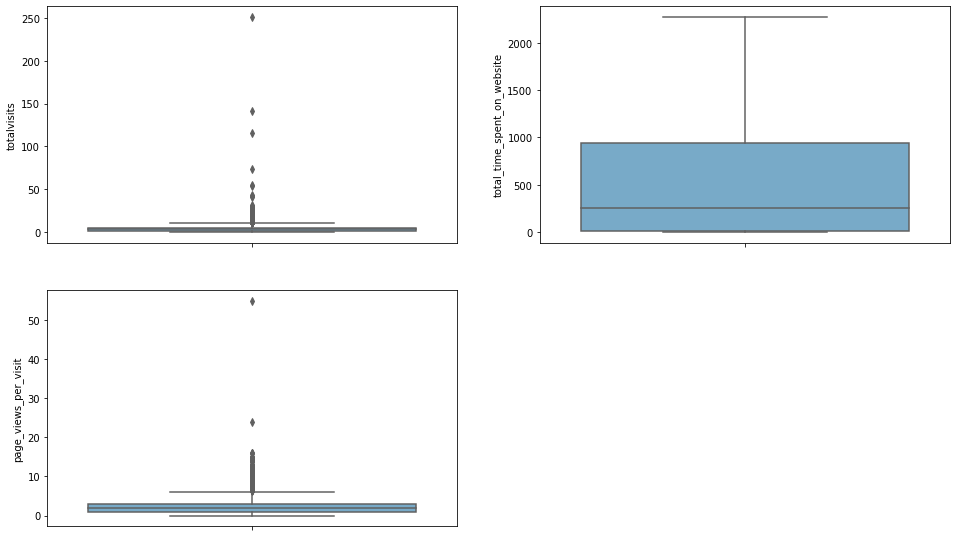

In [51]:
# Check the outliers using plots

plt.figure(figsize = (25,20))
plt.subplot(4,3,1)
sns.boxplot(y = 'totalvisits' , data = df_1 , palette = 'Blues')
plt.subplot(4,3,2)
sns.boxplot(y = 'total_time_spent_on_website' , data = df_1 , palette = 'Blues')
plt.subplot(4,3,4)
sns.boxplot(y = 'page_views_per_visit' , data = df_1 , palette = 'Blues')




In [52]:
# We have outliers in totalvisits , so removing beyond 99%

np_quartile_totalvisits = df_1['totalvisits'].quantile(0.97)
df_1 = df_1[df_1['totalvisits']< np_quartile_totalvisits]

In [53]:
df_1.totalvisits.describe()

count    8887.000000
mean        2.908293
std         2.450644
min         0.000000
25%         1.000000
50%         3.000000
75%         4.000000
max        10.000000
Name: totalvisits, dtype: float64

In [54]:
# We have outliers in page_views_per_visit, so removing beyong 99%

np_quartile_totalvisits = df_1['page_views_per_visit'].quantile(0.97)
df_1 = df_1[df_1['page_views_per_visit']< np_quartile_totalvisits]


In [55]:
df_1.page_views_per_visit.describe()

count    8611.000000
mean        2.064067
std         1.637341
min         0.000000
25%         0.000000
50%         2.000000
75%         3.000000
max         6.000000
Name: page_views_per_visit, dtype: float64

<AxesSubplot: ylabel='page_views_per_visit'>

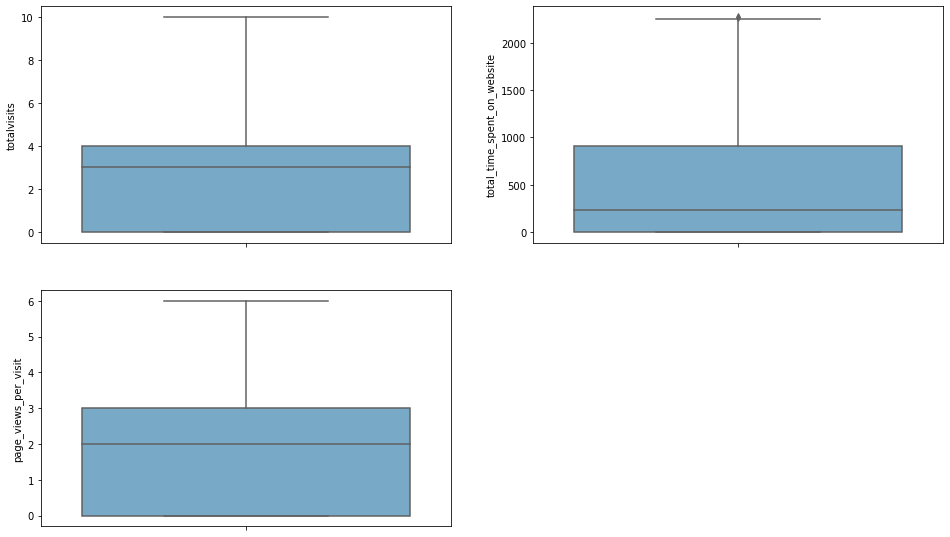

In [56]:
# After outlier removal


plt.figure(figsize = (25,20))
plt.subplot(4,3,1)
sns.boxplot(y = 'totalvisits' , data = df_1 , palette = 'Blues')
plt.subplot(4,3,2)
sns.boxplot(y = 'total_time_spent_on_website' , data = df_1 , palette = 'Blues')
plt.subplot(4,3,4)
sns.boxplot(y = 'page_views_per_visit' , data = df_1 , palette = 'Blues')

In [57]:
df_1.shape

(8611, 19)

# EDA

## Univariate Analysis / Bivariate Analysis

<AxesSubplot: xlabel='page_views_per_visit', ylabel='Density'>

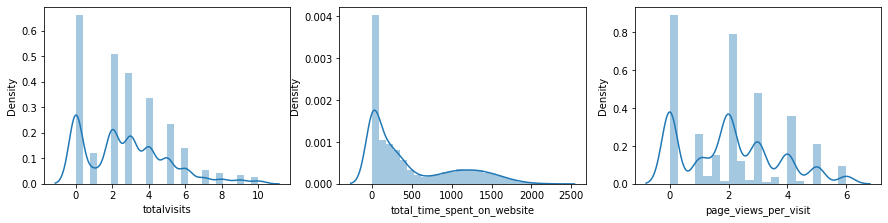

In [58]:
# Univariate analysis of numerical columns 

plt.figure(figsize=(15,15))
plt.subplot(4,3,1)
sns.distplot(df_1['totalvisits'])
plt.subplot(4,3,2)
sns.distplot(df_1['total_time_spent_on_website'])
plt.subplot(4,3,3)
sns.distplot(df_1['page_views_per_visit'])

Text(0, 0.5, 'Counts')

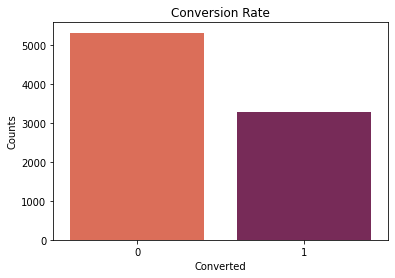

In [59]:
# Checking the rate of conversion

sns.countplot(data = df_1 , x='converted',  palette = 'rocket_r')

plt.title("Conversion Rate")
plt.xlabel('Converted')
plt.ylabel('Counts')

In [60]:
df_1.converted.value_counts(normalize= True)

0    0.617814
1    0.382186
Name: converted, dtype: float64

#### It could be inferred from graph that around 39% is the conversion rate.

Text(0.5, 0, 'Lead Origin')

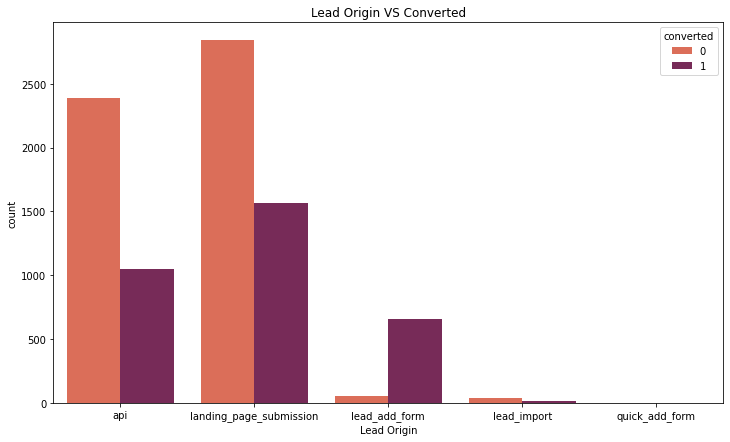

In [61]:
# A look at lead origin vs lead converted 

plt.figure(figsize = (12,7))
sns.countplot(data=df_1, x='lead_origin' , hue='converted' ,  palette = 'rocket_r')


plt.title("Lead Origin VS Converted")
plt.xlabel('Lead Origin')


#### Its inferred that maximum conversion takes place from landing page submission followed by api.

Text(0.5, 0, 'Lead Source')

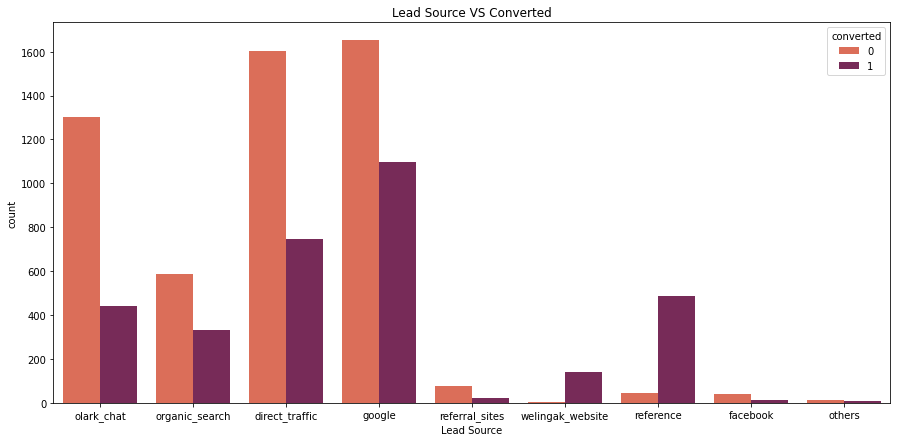

In [62]:
# A look at lead source vs lead converted 

plt.figure(figsize = (15,7))
sns.countplot(data=df_1, x='lead_source' , hue='converted' ,  palette = 'rocket_r')


plt.title("Lead Source VS Converted")
plt.xlabel('Lead Source')


#### Its inferred that maximum conversion happens for google lead source followed by direct traffic to site.

Text(0.5, 0, 'Do not Email')

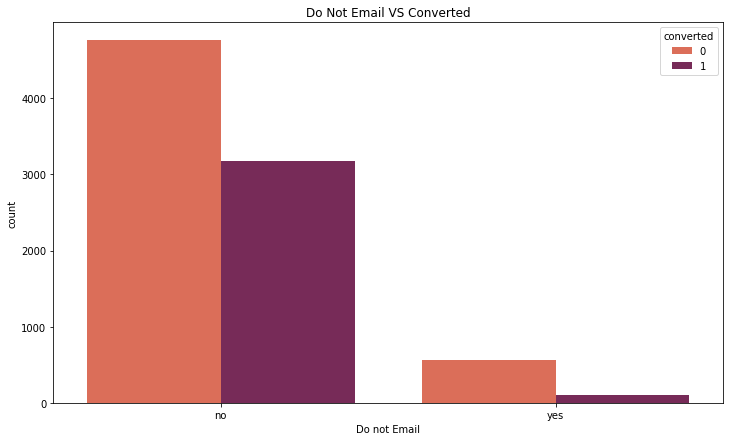

In [63]:
# A look at Do Not Email vs lead converted 

plt.figure(figsize = (12,7))
sns.countplot(data=df_1, x='do_not_email' , hue='converted',  palette = 'rocket_r')


plt.title("Do Not Email VS Converted")
plt.xlabel('Do not Email')


#### Its inferred that maximum conversion happens for mails sent

Text(0.5, 0, 'Do not Call')

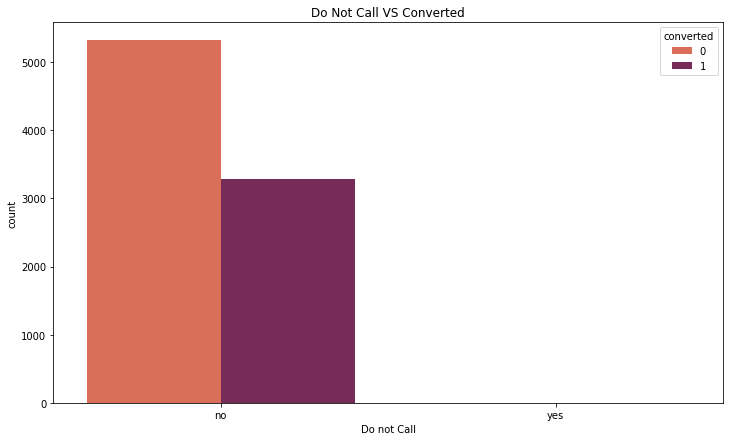

In [64]:
# A look at Do Not Call vs lead converted 

plt.figure(figsize = (12,7))
sns.countplot(data=df_1, x='do_not_call' , hue='converted',  palette = 'rocket_r')


plt.title("Do Not Call VS Converted")
plt.xlabel('Do not Call')

#### Its inferred that conversion happens when calls are made.

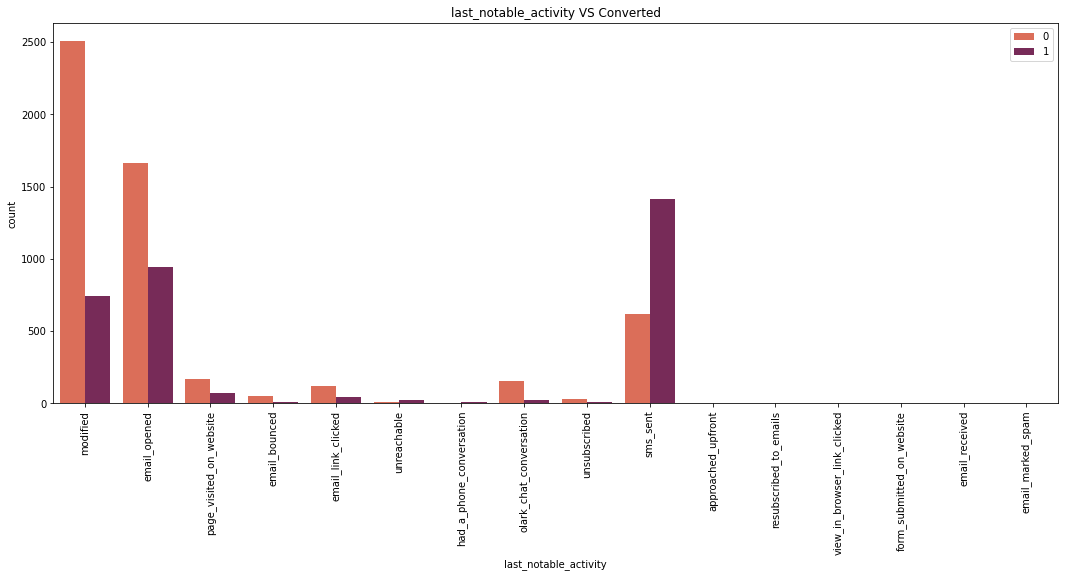

In [65]:
# A look at last_notable_activity  vs lead converted 

plt.figure(figsize = (18,7))
sns.countplot(data=df_1, x='last_notable_activity' , hue='converted',  palette = 'rocket_r')


plt.title("last_notable_activity VS Converted")
plt.xlabel('last_notable_activity')
plt.xticks(rotation=90)
plt.legend(loc='upper right')
plt.show()

#### Its inferred that activity like sms send gets maximum conversion followed by email opened 

Text(0.5, 0, 'Current Occupation')

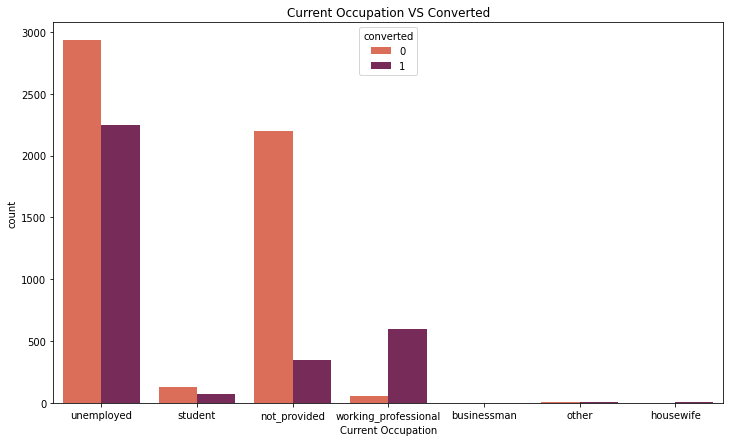

In [66]:
# A look at Current Occupation vs lead converted 

plt.figure(figsize = (12,7))
plot=sns.countplot(data=df_1, x='what_is_your_current_occupation' , hue='converted',  palette = 'rocket_r')


plt.title("Current Occupation VS Converted")
plt.xlabel('Current Occupation')



#### Its inffered that maximum conversion takes place for unemployed followed by  working professional and could also see that almost all housewives contacted got converted.

In [67]:
df_1.columns

Index(['lead_origin', 'lead_source', 'do_not_email', 'do_not_call',
       'converted', 'totalvisits', 'total_time_spent_on_website',
       'page_views_per_visit', 'country', 'specialization',
       'what_is_your_current_occupation', 'search', 'newspaper_article',
       'x_education_forums', 'newspaper', 'digital_advertisement',
       'through_recommendations', 'a_free_copy_of_mastering_the_interview',
       'last_notable_activity'],
      dtype='object')

Text(0.5, 0, 'search')

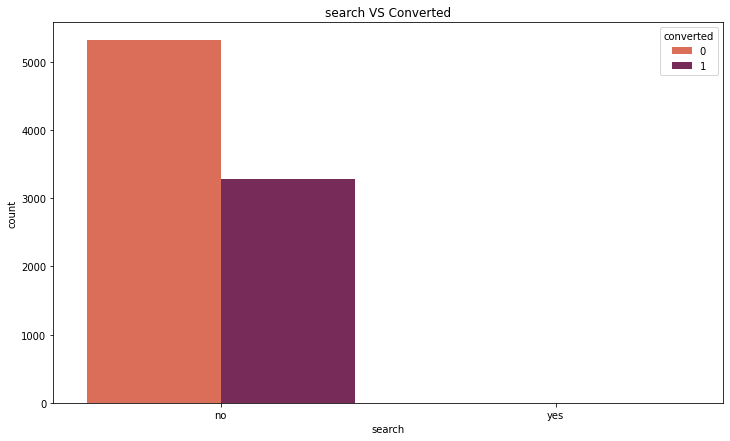

In [68]:
# A look at Search vs lead converted 

plt.figure(figsize = (12,7))
plot=sns.countplot(data=df_1, x='search' , hue='converted',  palette = 'rocket_r')


plt.title("search VS Converted")
plt.xlabel('search')



#### Its inferred that conversion rate is high for leads who are not through search

In [69]:
# A look at newspaper_article vs lead converted 

df_1.newspaper_article.value_counts()

no    8611
Name: newspaper_article, dtype: int64

In [70]:
df_1.x_education_forums.value_counts()

no    8611
Name: x_education_forums, dtype: int64

In [71]:
df_1.newspaper.value_counts()

no     8610
yes       1
Name: newspaper, dtype: int64

In [72]:
df_1.digital_advertisement.value_counts()

no     8609
yes       2
Name: digital_advertisement, dtype: int64

Text(0.5, 0, 'digital_advertisement')

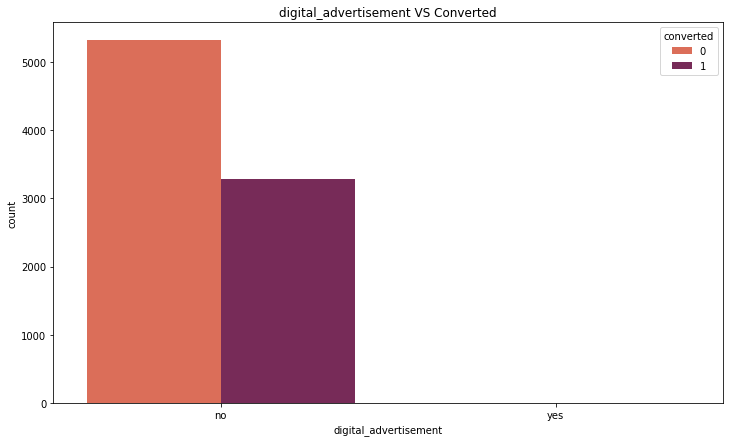

In [73]:
# A look at digital_advertisement vs lead converted 

plt.figure(figsize = (12,7))
plot=sns.countplot(data=df_1, x='digital_advertisement' , hue='converted',  palette = 'rocket_r')


plt.title("digital_advertisement VS Converted")
plt.xlabel('digital_advertisement')


#### Most leads are not from digital_advertisment

In [74]:
df_1.through_recommendations.value_counts()

no     8608
yes       3
Name: through_recommendations, dtype: int64

Text(0.5, 0, 'through_recommendations')

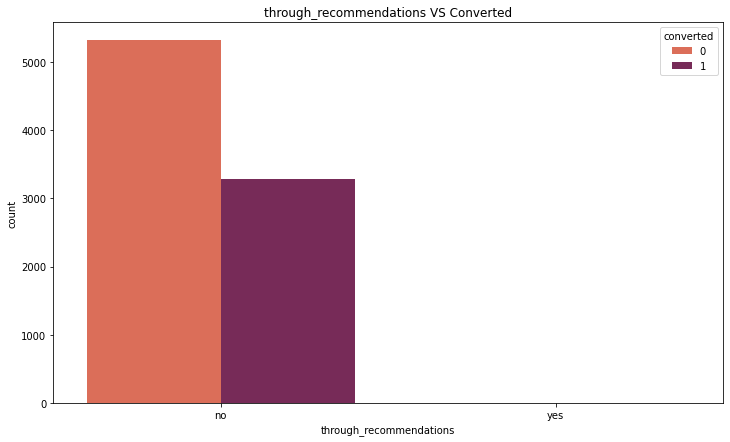

In [75]:
# A look at through_recommendations vs lead converted 

plt.figure(figsize = (12,7))
plot=sns.countplot(data=df_1, x='through_recommendations' , hue='converted',  palette = 'rocket_r')


plt.title("through_recommendations VS Converted")
plt.xlabel('through_recommendations')


In [76]:
#### Its inferred that there are most leads without recommendations.

In [77]:
df_1.a_free_copy_of_mastering_the_interview.value_counts()

no     6076
yes    2535
Name: a_free_copy_of_mastering_the_interview, dtype: int64

Text(0.5, 0, 'a_free_copy_of_mastering_the_interview')

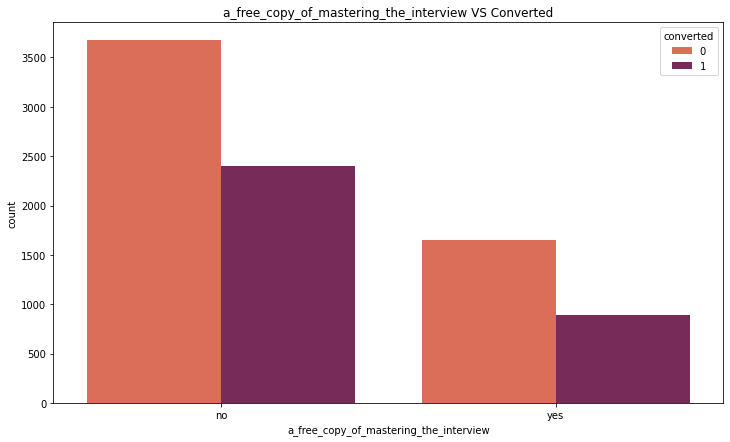

In [78]:
# A look at a_free_copy_of_mastering_the_interview vs lead converted 

plt.figure(figsize = (12,7))
plot=sns.countplot(data=df_1, x='a_free_copy_of_mastering_the_interview' , hue='converted' , palette = 'rocket_r')


plt.title("a_free_copy_of_mastering_the_interview VS Converted")
plt.xlabel('a_free_copy_of_mastering_the_interview')


#### Its inferred that conversion rates are higher for ones which do not opt for free copy of mastering the interview

<AxesSubplot: xlabel='converted', ylabel='page_views_per_visit'>

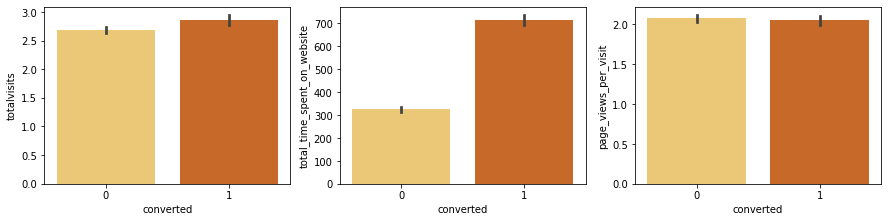

In [79]:
# Looking into numerical columns 

plt.figure(figsize=(15,15))
plt.subplot(4,3,1)
sns.barplot(y='totalvisits' , x='converted' , data=df_1, palette='YlOrBr')
plt.subplot(4,3,2)
sns.barplot(y='total_time_spent_on_website' , x='converted' , data=df_1, palette='YlOrBr')
plt.subplot(4,3,3)
sns.barplot(y='page_views_per_visit' , x='converted' , data=df_1, palette='YlOrBr')


# Bivariate Analysis

<Figure size 1080x1080 with 0 Axes>

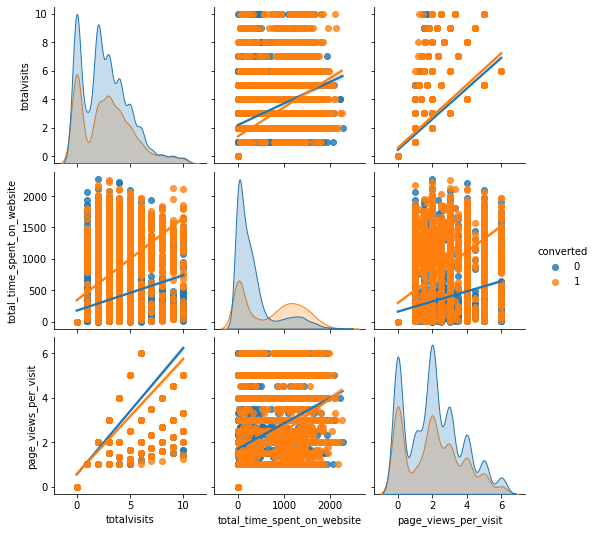

In [80]:
# A look at numerical variables

plt.figure(figsize=(15,15))
sns.pairplot(data = df_1 , vars=df_1.columns[5:8], hue='converted' , kind='reg')
plt.show()

# Creating Dummies 

### Before creating dummies we can remove some variables like newspaper_article, x_education_forums, newspaper , as they have ~99.9% similar data , so hardly any use of these columns in analysis and model building 




In [81]:
df_1 = df_1.drop(['newspaper_article' , 'x_education_forums' , 'newspaper'] , axis =1 )

In [82]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8611 entries, 0 to 9239
Data columns (total 16 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   lead_origin                             8611 non-null   object 
 1   lead_source                             8611 non-null   object 
 2   do_not_email                            8611 non-null   object 
 3   do_not_call                             8611 non-null   object 
 4   converted                               8611 non-null   int64  
 5   totalvisits                             8611 non-null   float64
 6   total_time_spent_on_website             8611 non-null   int64  
 7   page_views_per_visit                    8611 non-null   float64
 8   country                                 8611 non-null   object 
 9   specialization                          8611 non-null   object 
 10  what_is_your_current_occupation         8611 non-null   obje

In [83]:
# Creating dummies for categorical variables 

dummies = pd.get_dummies(df_1.select_dtypes(include=['object']) , drop_first=True)


In [84]:
#  removing original variables from data set

final_df = df_1.drop(df_1.select_dtypes(include=['object']).columns , axis=1)

In [85]:
# Merging the dummies with main df

final_df = pd.concat([final_df,dummies] , axis=1)

In [86]:
final_df.shape

(8611, 63)

# Correlations

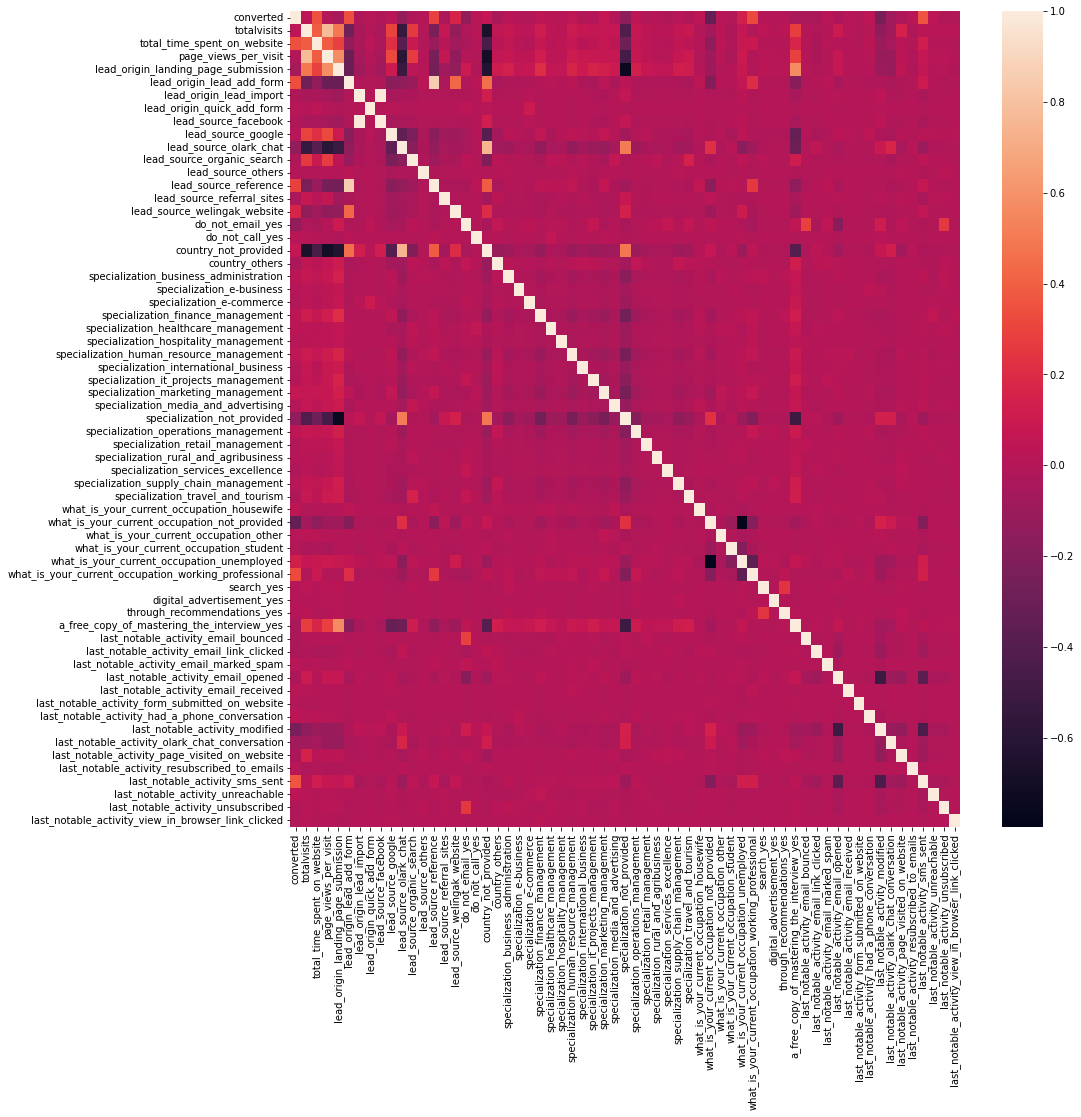

In [87]:
# A look at the correlations between variables 

plt.figure(figsize=(15,15))
sns.heatmap(final_df.corr())
plt.show()

# Splitting the dataset

In [88]:
# Creating X dataframe
X = final_df.drop(['converted'], axis=1)
X.head()

,totalvisits,total_time_spent_on_website,page_views_per_visit,lead_origin_landing_page_submission,lead_origin_lead_add_form,lead_origin_lead_import,lead_origin_quick_add_form,lead_source_facebook,lead_source_google,lead_source_olark_chat,...,last_notable_activity_form_submitted_on_website,last_notable_activity_had_a_phone_conversation,last_notable_activity_modified,last_notable_activity_olark_chat_conversation,last_notable_activity_page_visited_on_website,last_notable_activity_resubscribed_to_emails,last_notable_activity_sms_sent,last_notable_activity_unreachable,last_notable_activity_unsubscribed,last_notable_activity_view_in_browser_link_clicked
0,0.0,0,0.0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2.0,1532,2.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.0,305,1.0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,2.0,1428,1.0,1,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0


In [89]:
# Creating Y dataframe

y = final_df['converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: converted, dtype: int64

In [90]:
# Splitting the dataset into Train and Test 

X_train, X_test, y_train, y_test = train_test_split(X , y, train_size=0.7 , random_state=76)

# Scaling

In [91]:
# Scaling the dataset using Standard scaler 

scaler = MinMaxScaler()

cols = ['totalvisits' , 'total_time_spent_on_website' , 'page_views_per_visit']

X_train[cols] = scaler.fit_transform(X_train[cols])

X_test[cols] = scaler.transform(X_test[cols])

X_train.head()

,totalvisits,total_time_spent_on_website,page_views_per_visit,lead_origin_landing_page_submission,lead_origin_lead_add_form,lead_origin_lead_import,lead_origin_quick_add_form,lead_source_facebook,lead_source_google,lead_source_olark_chat,...,last_notable_activity_form_submitted_on_website,last_notable_activity_had_a_phone_conversation,last_notable_activity_modified,last_notable_activity_olark_chat_conversation,last_notable_activity_page_visited_on_website,last_notable_activity_resubscribed_to_emails,last_notable_activity_sms_sent,last_notable_activity_unreachable,last_notable_activity_unsubscribed,last_notable_activity_view_in_browser_link_clicked
3193,1.0,0.095070,0.208333,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3760,0.0,0.000000,0.000000,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
1038,0.7,0.006162,0.583333,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
8294,0.0,0.000000,0.000000,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
5183,0.3,0.436620,0.333333,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


# Feature Selection Using RFE

In [92]:
logreg = LogisticRegression()

rfe = RFE(logreg , 20)

rfe= rfe.fit(X_train, y_train)

In [93]:
list(zip(X_train.columns , rfe.support_ , rfe.ranking_ ))

[('totalvisits', True, 1),
 ('total_time_spent_on_website', True, 1),
 ('page_views_per_visit', True, 1),
 ('lead_origin_landing_page_submission', True, 1),
 ('lead_origin_lead_add_form', True, 1),
 ('lead_origin_lead_import', True, 1),
 ('lead_origin_quick_add_form', False, 41),
 ('lead_source_facebook', False, 8),
 ('lead_source_google', False, 20),
 ('lead_source_olark_chat', False, 33),
 ('lead_source_organic_search', False, 21),
 ('lead_source_others', False, 19),
 ('lead_source_reference', False, 10),
 ('lead_source_referral_sites', False, 23),
 ('lead_source_welingak_website', True, 1),
 ('do_not_email_yes', True, 1),
 ('do_not_call_yes', False, 22),
 ('country_not_provided', True, 1),
 ('country_others', False, 6),
 ('specialization_business_administration', False, 29),
 ('specialization_e-business', False, 42),
 ('specialization_e-commerce', False, 36),
 ('specialization_finance_management', False, 28),
 ('specialization_healthcare_management', False, 11),
 ('specialization_ho

In [94]:
# A look at the columns selected 

cols = X_train.columns[rfe.support_]

cols

Index(['totalvisits', 'total_time_spent_on_website', 'page_views_per_visit',
       'lead_origin_landing_page_submission', 'lead_origin_lead_add_form',
       'lead_origin_lead_import', 'lead_source_welingak_website',
       'do_not_email_yes', 'country_not_provided',
       'specialization_not_provided',
       'what_is_your_current_occupation_housewife',
       'what_is_your_current_occupation_not_provided',
       'what_is_your_current_occupation_unemployed',
       'what_is_your_current_occupation_working_professional',
       'last_notable_activity_had_a_phone_conversation',
       'last_notable_activity_olark_chat_conversation',
       'last_notable_activity_resubscribed_to_emails',
       'last_notable_activity_sms_sent', 'last_notable_activity_unreachable',
       'last_notable_activity_unsubscribed'],
      dtype='object')

# Model Building 

## Model_1

In [95]:
X_train_sm = sm.add_constant(X_train[cols])

logreg1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())

result = logreg1.fit()

result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              converted   No. Observations:                 6027
Model:                            GLM   Df Residuals:                     6006
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2387.7
Date:                Sat, 15 Apr 2023   Deviance:                       4775.3
Time:                        17:36:13   Pearson chi2:                 6.20e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.3334      0.262     -5.086      0.000      -1.847      -0.820
totalvisits                                              1.2548      0.240      5.221      0.000       0.784       1.726
total_time_spent_on_website                              4.6817      0.180     26.075      0.000       4.330       5.034
page_views_per_visit                                    -0.9014      0.226     -3.980      0.000      -1.345      -0.457
lead_origin_landing_page_submission                     -1.0477      0.131     -7.996      0.000      -1.304      -0.791
lead_origin_lead_add_form                                2.1811      0.215     10.163      0.000       1.760       2.602
lead_origin_lead_import                                 -1.1864      0.519     -2.288      0.022      -2.203      -0.170
lead_source_welingak_website                             3.0556      1.033      2.957      0.003       1.030       5.081
do_not_email_yes                                        -1.2478      0.179     -6.954      0.000      -1.600      -0.896
country_not_provided                                     1.1190      0.144      7.757      0.000       0.836       1.402
specialization_not_provided                             -1.0631      0.129     -8.260      0.000      -1.315      -0.811
what_is_your_current_occupation_housewife               23.0382    1.5e+04      0.002      0.999   -2.94e+04    2.94e+04
what_is_your_current_occupation_not_provided            -1.0849      0.230     -4.718      0.000      -1.536      -0.634
what_is_your_current_occupation_unemployed              -0.0770      0.220     -0.350      0.726      -0.508       0.354
what_is_your_current_occupation_working_professional     2.1627      0.282      7.678      0.000       1.611       2.715
last_notable_activity_had_a_phone_conversation           3.2220      1.208      2.668      0.008       0.855       5.589
last_notable_activity_olark_chat_conversation           -1.4926      0.425     -3.510      0.000      -2.326      -0.659
last_notable_activity_resubscribed_to_emails            24.9284   4.82e+04      0.001      1.000   -9.44e+04    9.45e+04
last_notable_activity_sms_sent                           1.8156      0.084     21.489      0.000       1.650       1.981
last_notable_activity_unreachable                        1.6139      0.577      2.797      0.005       0.483       2.745
last_notable_activity_unsubscribed                       1.5376      0.493      3.117      0.002       0.571       2.505
========================================================================================================================
"""

# VIF 

In [96]:
def get_vif():
    vif = pd.DataFrame()
    vif['features'] = X_train[cols].columns
    vif['VIF'] = [variance_inflation_factor(X_train[cols].values, i) for i in range(X_train[cols].shape[1])]
    vif['VIF'] = round(vif['VIF'] , 2)
    vif = vif.sort_values(by = 'VIF' , ascending= False)
    return vif

get_vif()

,features,VIF
12,what_is_your_current_occupation_unemployed,8.44
2,page_views_per_visit,8.01
0,totalvisits,6.35
3,lead_origin_landing_page_submission,5.80
11,what_is_your_current_occupation_not_provided,4.87
9,specialization_not_provided,4.09
8,country_not_provided,3.71
1,total_time_spent_on_website,2.31
4,lead_origin_lead_add_form,1.95
13,what_is_your_current_occupation_working_profes...,1.94


#### Since , what_is_your_current_occupation_housewife has high p_value , so dropping it off 


In [97]:
col1 = cols.drop('what_is_your_current_occupation_housewife', 1)

# Model_2

In [98]:
X_train_sm = sm.add_constant(X_train[col1])

logreg2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())

result = logreg2.fit()

result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              converted   No. Observations:                 6027
Model:                            GLM   Df Residuals:                     6007
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2393.8
Date:                Sat, 15 Apr 2023   Deviance:                       4787.6
Time:                        17:36:14   Pearson chi2:                 6.20e+03
No. Iterations:                    19                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.1794      0.255     -4.620      0.000      -1.680      -0.679
totalvisits                                              1.2436      0.240      5.180      0.000       0.773       1.714
total_time_spent_on_website                              4.6770      0.179     26.087      0.000       4.326       5.028
page_views_per_visit                                    -0.9004      0.226     -3.979      0.000      -1.344      -0.457
lead_origin_landing_page_submission                     -1.0415      0.131     -7.963      0.000      -1.298      -0.785
lead_origin_lead_add_form                                2.1832      0.215     10.174      0.000       1.763       2.604
lead_origin_lead_import                                 -1.1774      0.518     -2.272      0.023      -2.193      -0.162
lead_source_welingak_website                             3.0607      1.033      2.962      0.003       1.035       5.086
do_not_email_yes                                        -1.2512      0.179     -6.980      0.000      -1.602      -0.900
country_not_provided                                     1.1092      0.144      7.698      0.000       0.827       1.392
specialization_not_provided                             -1.0639      0.128     -8.280      0.000      -1.316      -0.812
what_is_your_current_occupation_not_provided            -1.2333      0.222     -5.546      0.000      -1.669      -0.797
what_is_your_current_occupation_unemployed              -0.2268      0.212     -1.069      0.285      -0.643       0.189
what_is_your_current_occupation_working_professional     2.0104      0.275      7.301      0.000       1.471       2.550
last_notable_activity_had_a_phone_conversation           3.2150      1.207      2.663      0.008       0.849       5.581
last_notable_activity_olark_chat_conversation           -1.5048      0.427     -3.528      0.000      -2.341      -0.669
last_notable_activity_resubscribed_to_emails            22.9334   1.77e+04      0.001      0.999   -3.47e+04    3.48e+04
last_notable_activity_sms_sent                           1.8122      0.084     21.456      0.000       1.647       1.978
last_notable_activity_unreachable                        1.6096      0.578      2.786      0.005       0.477       2.742
last_notable_activity_unsubscribed                       1.5389      0.493      3.120      0.002       0.572       2.506
========================================================================================================================
"""

## VIF

In [99]:
def get_vif():
    vif = pd.DataFrame()
    vif['features'] = X_train[col1].columns
    vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
    vif['VIF'] = round(vif['VIF'] , 2)
    vif = vif.sort_values(by = 'VIF' , ascending= False)
    return vif

get_vif()

,features,VIF
11,what_is_your_current_occupation_unemployed,8.34
2,page_views_per_visit,8.01
0,totalvisits,6.35
3,lead_origin_landing_page_submission,5.78
10,what_is_your_current_occupation_not_provided,4.83
9,specialization_not_provided,4.08
8,country_not_provided,3.70
1,total_time_spent_on_website,2.31
4,lead_origin_lead_add_form,1.95
12,what_is_your_current_occupation_working_profes...,1.93


### Since we have last_notable_activity_resubscribed_to_emails with high p_value, so dropping it 

In [100]:
col2 = col1.drop('last_notable_activity_resubscribed_to_emails' , 1)

## Model_3

In [101]:
X_train_sm = sm.add_constant(X_train[col2])

logreg3 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())

result = logreg3.fit()

result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              converted   No. Observations:                 6027
Model:                            GLM   Df Residuals:                     6008
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2396.3
Date:                Sat, 15 Apr 2023   Deviance:                       4792.5
Time:                        17:36:14   Pearson chi2:                 6.21e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.1811      0.255     -4.627      0.000      -1.681      -0.681
totalvisits                                              1.2423      0.240      5.177      0.000       0.772       1.713
total_time_spent_on_website                              4.6754      0.179     26.087      0.000       4.324       5.027
page_views_per_visit                                    -0.9002      0.226     -3.979      0.000      -1.344      -0.457
lead_origin_landing_page_submission                     -1.0403      0.131     -7.956      0.000      -1.297      -0.784
lead_origin_lead_add_form                                2.1792      0.215     10.157      0.000       1.759       2.600
lead_origin_lead_import                                 -1.1822      0.518     -2.281      0.023      -2.198      -0.167
lead_source_welingak_website                             3.0600      1.033      2.961      0.003       1.035       5.085
do_not_email_yes                                        -1.2518      0.179     -6.985      0.000      -1.603      -0.901
country_not_provided                                     1.1140      0.144      7.736      0.000       0.832       1.396
specialization_not_provided                             -1.0628      0.128     -8.273      0.000      -1.315      -0.811
what_is_your_current_occupation_not_provided            -1.2272      0.222     -5.521      0.000      -1.663      -0.792
what_is_your_current_occupation_unemployed              -0.2258      0.212     -1.064      0.287      -0.642       0.190
what_is_your_current_occupation_working_professional     2.0116      0.275      7.307      0.000       1.472       2.551
last_notable_activity_had_a_phone_conversation           3.2133      1.207      2.663      0.008       0.848       5.579
last_notable_activity_olark_chat_conversation           -1.5084      0.426     -3.539      0.000      -2.344      -0.673
last_notable_activity_sms_sent                           1.8107      0.084     21.445      0.000       1.645       1.976
last_notable_activity_unreachable                        1.6072      0.577      2.784      0.005       0.476       2.739
last_notable_activity_unsubscribed                       1.5384      0.493      3.120      0.002       0.572       2.505
========================================================================================================================
"""

## VIF

In [102]:
def get_vif():
    vif = pd.DataFrame()
    vif['features'] = X_train[col2].columns
    vif['VIF'] = [variance_inflation_factor(X_train[col2].values, i) for i in range(X_train[col2].shape[1])]
    vif['VIF'] = round(vif['VIF'] , 2)
    vif = vif.sort_values(by = 'VIF' , ascending= False)
    return vif

get_vif()

,features,VIF
11,what_is_your_current_occupation_unemployed,8.34
2,page_views_per_visit,8.01
0,totalvisits,6.35
3,lead_origin_landing_page_submission,5.78
10,what_is_your_current_occupation_not_provided,4.83
9,specialization_not_provided,4.08
8,country_not_provided,3.70
1,total_time_spent_on_website,2.31
4,lead_origin_lead_add_form,1.95
12,what_is_your_current_occupation_working_profes...,1.93


In [103]:
### As we have last_notable_activity_email_marked_spam , with high p_value and high VIF so dropping it off

In [104]:
col3 = col2.drop('what_is_your_current_occupation_unemployed' , 1)

## Model_4

In [105]:
X_train_sm = sm.add_constant(X_train[col3])

logreg4 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())

result = logreg4.fit()

result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              converted   No. Observations:                 6027
Model:                            GLM   Df Residuals:                     6009
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2396.8
Date:                Sat, 15 Apr 2023   Deviance:                       4793.6
Time:                        17:36:14   Pearson chi2:                 6.21e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.3951      0.157     -8.858      0.000      -1.704      -1.086
totalvisits                                              1.2406      0.240      5.169      0.000       0.770       1.711
total_time_spent_on_website                              4.6778      0.179     26.100      0.000       4.326       5.029
page_views_per_visit                                    -0.9069      0.226     -4.011      0.000      -1.350      -0.464
lead_origin_landing_page_submission                     -1.0380      0.131     -7.934      0.000      -1.294      -0.782
lead_origin_lead_add_form                                2.1752      0.214     10.144      0.000       1.755       2.595
lead_origin_lead_import                                 -1.1952      0.518     -2.307      0.021      -2.210      -0.180
lead_source_welingak_website                             3.0506      1.033      2.952      0.003       1.025       5.076
do_not_email_yes                                        -1.2540      0.179     -6.996      0.000      -1.605      -0.903
country_not_provided                                     1.1190      0.144      7.775      0.000       0.837       1.401
specialization_not_provided                             -1.0639      0.129     -8.274      0.000      -1.316      -0.812
what_is_your_current_occupation_not_provided            -1.0117      0.092    -10.973      0.000      -1.192      -0.831
what_is_your_current_occupation_working_professional     2.2276      0.186     11.960      0.000       1.863       2.593
last_notable_activity_had_a_phone_conversation           3.2065      1.207      2.656      0.008       0.840       5.573
last_notable_activity_olark_chat_conversation           -1.4914      0.424     -3.517      0.000      -2.322      -0.660
last_notable_activity_sms_sent                           1.8044      0.084     21.434      0.000       1.639       1.969
last_notable_activity_unreachable                        1.6065      0.576      2.787      0.005       0.477       2.736
last_notable_activity_unsubscribed                       1.5325      0.493      3.107      0.002       0.566       2.499
========================================================================================================================
"""

## VIF

In [106]:
def get_vif():
    vif = pd.DataFrame()
    vif['features'] = X_train[col3].columns
    vif['VIF'] = [variance_inflation_factor(X_train[col3].values, i) for i in range(X_train[col3].shape[1])]
    vif['VIF'] = round(vif['VIF'] , 2)
    vif = vif.sort_values(by = 'VIF' , ascending= False)
    return vif

get_vif()

,features,VIF
2,page_views_per_visit,7.61
0,totalvisits,6.13
3,lead_origin_landing_page_submission,4.06
8,country_not_provided,2.98
9,specialization_not_provided,2.93
1,total_time_spent_on_website,2.21
4,lead_origin_lead_add_form,1.89
10,what_is_your_current_occupation_not_provided,1.64
14,last_notable_activity_sms_sent,1.41
6,lead_source_welingak_website,1.27


### Since , we have high VIF value for page_views_per_visit , so dropping it off

In [107]:
col4 = col3.drop('page_views_per_visit' , 1)

## Model_5

In [108]:
X_train_sm = sm.add_constant(X_train[col4])

logreg5 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())

result = logreg5.fit()

result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              converted   No. Observations:                 6027
Model:                            GLM   Df Residuals:                     6010
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2405.0
Date:                Sat, 15 Apr 2023   Deviance:                       4809.9
Time:                        17:36:14   Pearson chi2:                 6.24e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.5575      0.153    -10.211      0.000      -1.856      -1.259
totalvisits                                              0.7351      0.206      3.570      0.000       0.331       1.139
total_time_spent_on_website                              4.6448      0.179     26.015      0.000       4.295       4.995
lead_origin_landing_page_submission                     -1.1134      0.129     -8.612      0.000      -1.367      -0.860
lead_origin_lead_add_form                                2.1793      0.214     10.170      0.000       1.759       2.599
lead_origin_lead_import                                 -1.2643      0.520     -2.430      0.015      -2.284      -0.245
lead_source_welingak_website                             3.0548      1.033      2.956      0.003       1.029       5.080
do_not_email_yes                                        -1.2627      0.180     -7.033      0.000      -1.615      -0.911
country_not_provided                                     1.2734      0.139      9.167      0.000       1.001       1.546
specialization_not_provided                             -1.0619      0.128     -8.270      0.000      -1.314      -0.810
what_is_your_current_occupation_not_provided            -1.0065      0.092    -10.951      0.000      -1.187      -0.826
what_is_your_current_occupation_working_professional     2.2257      0.187     11.910      0.000       1.859       2.592
last_notable_activity_had_a_phone_conversation           3.1527      1.217      2.590      0.010       0.767       5.539
last_notable_activity_olark_chat_conversation           -1.4614      0.421     -3.469      0.001      -2.287      -0.636
last_notable_activity_sms_sent                           1.7705      0.083     21.235      0.000       1.607       1.934
last_notable_activity_unreachable                        1.5489      0.585      2.647      0.008       0.402       2.696
last_notable_activity_unsubscribed                       1.4643      0.494      2.963      0.003       0.496       2.433
========================================================================================================================
"""

## VIF

In [109]:
def get_vif():
    vif = pd.DataFrame()
    vif['features'] = X_train[col4].columns
    vif['VIF'] = [variance_inflation_factor(X_train[col4].values, i) for i in range(X_train[col4].shape[1])]
    vif['VIF'] = round(vif['VIF'] , 2)
    vif = vif.sort_values(by = 'VIF' , ascending= False)
    return vif

get_vif()

,features,VIF
0,totalvisits,3.60
2,lead_origin_landing_page_submission,3.35
7,country_not_provided,2.90
8,specialization_not_provided,2.81
1,total_time_spent_on_website,2.18
3,lead_origin_lead_add_form,1.88
9,what_is_your_current_occupation_not_provided,1.64
13,last_notable_activity_sms_sent,1.40
5,lead_source_welingak_website,1.27
10,what_is_your_current_occupation_working_profes...,1.21


### In order to reduce the variance we can drop lead_origin_lead_import

In [111]:
col5 = col4.drop('lead_origin_lead_import' , 1)

## Model_6

In [112]:
X_train_sm = sm.add_constant(X_train[col5])

logreg6 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())

result = logreg6.fit()

result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              converted   No. Observations:                 6027
Model:                            GLM   Df Residuals:                     6011
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2408.3
Date:                Sat, 15 Apr 2023   Deviance:                       4816.6
Time:                        17:37:30   Pearson chi2:                 6.23e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.5563      0.152    -10.229      0.000      -1.854      -1.258
totalvisits                                              0.7070      0.205      3.444      0.001       0.305       1.109
total_time_spent_on_website                              4.6204      0.178     25.929      0.000       4.271       4.970
lead_origin_landing_page_submission                     -1.0987      0.129     -8.531      0.000      -1.351      -0.846
lead_origin_lead_add_form                                2.2242      0.214     10.413      0.000       1.806       2.643
lead_source_welingak_website                             3.0479      1.033      2.950      0.003       1.023       5.073
do_not_email_yes                                        -1.2585      0.179     -7.015      0.000      -1.610      -0.907
country_not_provided                                     1.2177      0.137      8.874      0.000       0.949       1.487
specialization_not_provided                             -1.0465      0.128     -8.191      0.000      -1.297      -0.796
what_is_your_current_occupation_not_provided            -0.9981      0.092    -10.867      0.000      -1.178      -0.818
what_is_your_current_occupation_working_professional     2.2240      0.187     11.922      0.000       1.858       2.590
last_notable_activity_had_a_phone_conversation           3.1469      1.216      2.589      0.010       0.764       5.529
last_notable_activity_olark_chat_conversation           -1.4367      0.421     -3.411      0.001      -2.262      -0.611
last_notable_activity_sms_sent                           1.7758      0.083     21.329      0.000       1.613       1.939
last_notable_activity_unreachable                        1.5591      0.585      2.666      0.008       0.413       2.705
last_notable_activity_unsubscribed                       1.4672      0.493      2.974      0.003       0.500       2.434
========================================================================================================================
"""

## VIF

In [113]:
def get_vif():
    vif = pd.DataFrame()
    vif['features'] = X_train[col5].columns
    vif['VIF'] = [variance_inflation_factor(X_train[col5].values, i) for i in range(X_train[col5].shape[1])]
    vif['VIF'] = round(vif['VIF'] , 2)
    vif = vif.sort_values(by = 'VIF' , ascending= False)
    return vif

get_vif()

,features,VIF
0,totalvisits,3.59
2,lead_origin_landing_page_submission,3.34
6,country_not_provided,2.83
7,specialization_not_provided,2.81
1,total_time_spent_on_website,2.18
3,lead_origin_lead_add_form,1.87
8,what_is_your_current_occupation_not_provided,1.64
12,last_notable_activity_sms_sent,1.39
4,lead_source_welingak_website,1.27
9,what_is_your_current_occupation_working_profes...,1.21


#### This could be seen that we have low p-value for all variable and low VIF as well . So could have model_6 as final model with 15 variable.

# Predictions for Train Data Set 

In [114]:
y_train_pred = result.predict(X_train_sm)
y_train_pred.head()

3193    0.181121
3760    0.084458
1038    0.111109
8294    0.025537
5183    0.983937
dtype: float64

In [117]:
# reshaping the pred array 

y_train_pred = y_train_pred.reshape(-1)
y_train_pred

array([0.18112082, 0.08445772, 0.11110863, ..., 0.77948106, 0.10307992,
       0.98385126])

In [120]:
# Creating the DataFrame with actual and predicted Converted values 

y_train_pred_final_df = pd.DataFrame({'Converted' : y_train.values , 'Converted_Prob' : y_train_pred})
y_train_pred_final_df['Customer Id '] = y_train.index
y_train_pred_final_df.head()

,Converted,Converted_Prob,Customer Id
0,1,0.181121,3193
1,0,0.084458,3760
2,0,0.111109,1038
3,0,0.025537,8294
4,1,0.983937,5183


In [121]:
# Creating Predicted column storing the predictiond based on cut-off of 0.5

y_train_pred_final_df['Converted_Predicted'] = y_train_pred_final_df.Converted_Prob.map(lambda x: 1 if x>0.5 else 0)

y_train_pred_final_df.head()

,Converted,Converted_Prob,Customer Id,Converted_Predicted
0,1,0.181121,3193,0
1,0,0.084458,3760,0
2,0,0.111109,1038,0
3,0,0.025537,8294,0
4,1,0.983937,5183,1


## Model Performance 

### Confusion Matix

In [125]:

confusion_mt = metrics.confusion_matrix(y_train_pred_final_df.Converted , y_train_pred_final_df.Converted_Predicted)

confusion_mt


array([[3302,  412],
       [ 670, 1643]], dtype=int64)

In [126]:
TP = confusion_mt[1,1]
TN = confusion_mt[0,0]
FP = confusion_mt[0,1]
FN = confusion_mt[1,0]

In [131]:
# A look at the accuracy 
print("Accuracy::")
metrics.accuracy_score(y_train_pred_final_df.Converted , y_train_pred_final_df.Converted_Predicted)

Accuracy::


0.820474531275925

In [132]:
# We can also look at the sensitivity of the model 
print("Sensitivity::")
TP/float(TP+FN)

Sensitivity::


0.7103329009943796

In [134]:
# We can also look at the specificity of the model 
print("Specificity::")
TN/float(TN+FP)

Specificity::


0.8890683898761443

In [135]:
# True Positive Rate 

print('True Positive Rate ::')

TP/float(TP+FP)

True Positive Rate ::


0.7995133819951338

In [136]:
# True Negative Rate 

print('True Negative Rate ::')

TN/float(TN+FN)

True Negative Rate ::


0.8313192346424975

### It could be seen that specificity is good enough appx. 89% while sensitivity is around 71%, which is not good enough.

### High sensitivity could be because of cut-off point which we have taken as 0.5. So , we need to optimize it to get satisfying value of sensitivity using ROC curve.

## ROC CURVE

In [146]:
def roc_curve(actual , probabs):
    fpr , tpr , thresholds = metrics.roc_curve(actual , probabs , drop_intermediate = False)
    
    auc_curve = metrics.roc_auc_score(actual , probabs)
    plt.plot(fpr, tpr , label = 'ROC CURVE (area = %0.2f)' % auc_curve)
    plt.plot([0,1], [0,1], 'k--')
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('ROC - Curve')
    plt.legend(loc = 'lower right')
    plt.show()
    
    return None 
    

In [147]:

fpr , tpr , thresholds = metrics.roc_curve(y_train_pred_final_df.Converted , y_train_pred_final_df.Converted_Prob , drop_intermediate = False)

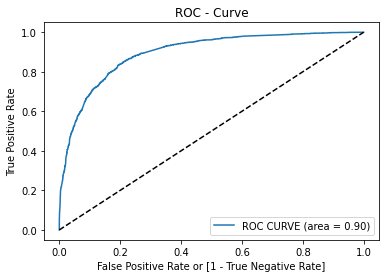

In [148]:
roc_curve(y_train_pred_final_df.Converted , y_train_pred_final_df.Converted_Prob)

## Optimal cutoff point

In [149]:
# Probability where we get balanced sensitivity and specificity

In [150]:
# Checking for differnt probability cut offs 

rn = [float(x)/10 for x in range(10)]

for i in rn:
    y_train_pred_final_df[i] = y_train_pred_final_df.Converted_Prob.map(lambda x : 1 if x > i else 0)
    
y_train_pred_final_df.head()    

,Converted,Converted_Prob,Customer Id,Converted_Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.181121,3193,0,1,1,0,0,0,0,0,0,0,0
1,0,0.084458,3760,0,1,0,0,0,0,0,0,0,0,0
2,0,0.111109,1038,0,1,1,0,0,0,0,0,0,0,0
3,0,0.025537,8294,0,1,0,0,0,0,0,0,0,0,0
4,1,0.983937,5183,1,1,1,1,1,1,1,1,1,1,1


In [153]:
# measuring metric for various cutoffs

measure_df = pd.DataFrame( columns = ['prob' , 'accuracy' , 'sensitivity' , 'specificity'])

from sklearn.metrics import confusion_matrix


rn = [0.0, 0.1, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

for i in rn:
    con_mat = metrics.confusion_matrix(y_train_pred_final_df.Converted , y_train_pred_final_df[i])
    total = sum(sum(con_mat))
    TP = con_mat[0,0]
    TN = con_mat[1,1]
    FP = con_mat[0,1]
    FN = con_mat[1,0]
    
    accuracy = (TP + TN ) / total
    specificity = TP / (TP + FP)
    sensitivity = TN / (FN + TN)
    measure_df.loc[i] = [i , accuracy, sensitivity, specificity]
    
    
measure_df    
    
    

,prob,accuracy,sensitivity,specificity
0.0,0.0,0.383773,1.000000,0.000000
0.1,0.1,0.651070,0.972763,0.450727
0.3,0.3,0.810851,0.853005,0.784599
0.4,0.4,0.819479,0.794639,0.834949
0.5,0.5,0.820475,0.710333,0.889068
0.6,0.6,0.803717,0.608301,0.925417
0.7,0.7,0.789613,0.532642,0.949650
0.8,0.8,0.770864,0.456982,0.966344
0.9,0.9,0.718102,0.289667,0.984922


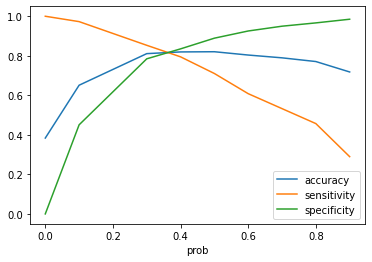

In [154]:
# Plotting the graph of sensitivity and specificity for peobabilities 

measure_df.plot.line(x='prob' , y=['accuracy','sensitivity','specificity'])

plt.show()

### Its around 0.38 for the optimal cutoff point probability.

In [156]:
# Making prdictions using 0.38 as cutoff.

y_train_pred_final_df['final_predicted'] = y_train_pred_final_df.Converted_Prob.map(lambda x: 1 if x > 0.38 else 0)
y_train_pred_final_df

,Converted,Converted_Prob,Customer Id,Converted_Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.181121,3193,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.084458,3760,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.111109,1038,0,1,1,0,0,0,0,0,0,0,0,0
3,0,0.025537,8294,0,1,0,0,0,0,0,0,0,0,0,0
4,1,0.983937,5183,1,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6022,1,0.420113,1404,0,1,1,1,1,1,0,0,0,0,0,1
6023,0,0.081640,5182,0,1,0,0,0,0,0,0,0,0,0,0
6024,1,0.779481,6898,1,1,1,1,1,1,1,1,1,0,0,1
6025,0,0.103080,7006,0,1,1,0,0,0,0,0,0,0,0,0


# Lead score for Train data set 

In [157]:
y_train_pred_final_df['Leads'] = y_train_pred_final_df.Converted_Prob.map(lambda x: round(x*100))

y_train_pred_final_df.head()

,Converted,Converted_Prob,Customer Id,Converted_Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Leads
0,1,0.181121,3193,0,1,1,0,0,0,0,0,0,0,0,0,18
1,0,0.084458,3760,0,1,0,0,0,0,0,0,0,0,0,0,8
2,0,0.111109,1038,0,1,1,0,0,0,0,0,0,0,0,0,11
3,0,0.025537,8294,0,1,0,0,0,0,0,0,0,0,0,0,3
4,1,0.983937,5183,1,1,1,1,1,1,1,1,1,1,1,1,98


In [161]:
# Checking for counts which are converted according to final prediction

y_train_pred_final_df.loc[y_train_pred_final_df['Converted'] == 1 , ['final_predicted']].value_counts(normalize = True)

final_predicted
1                  0.805447
0                  0.194553
dtype: float64

## As we can infer that around 80.5% of data is correctly predicted as Converted , by which we can say its a good model 

In [236]:
# Checking other metrics 


acurracy_train = metrics.accuracy_score(y_train_pred_final_df.Converted , y_train_pred_final_df.final_predicted)
print("Acurracy::  ", acurracy_train)

Acurracy::   0.8163265306122449


In [237]:
con_mat2 = metrics.confusion_matrix(y_train_pred_final_df.Converted , y_train_pred_final_df.final_predicted)
con_mat2

array([[3057,  657],
       [ 450, 1863]], dtype=int64)

In [238]:
TP = con_mat2[1,1]
TN = con_mat2[0,0]
FP = con_mat2[0,1]
FN = con_mat2[1,0]



In [239]:
# We can also look at the sensitivity of the model 

sens_train = TP/float(TP+FN)
print("Sensitivity::  " , sens_train)

Sensitivity::   0.8054474708171206


In [235]:
# We can also look at the specificity of the model 

spec_train = TN/float(TN+FP)
print("Specificity:: " , spec_train)

Specificity::  0.8231017770597738


In [169]:
# True Positive Rate 

print('True Positive Rate ::')

TP/float(TP+FP)

True Positive Rate ::


0.7392857142857143

In [170]:
# True Negative Rate 

print('True Negative Rate ::')

TN/float(TN+FN)

True Negative Rate ::


0.8716852010265184

In [173]:
# Precision 

print("Precision:: ")

TP/float(TP+FP)

Precision:: 


0.7392857142857143

In [174]:
# Recall 

print("Recall:: ")

TP/float(TP+FN)

Recall:: 


0.8054474708171206

In [234]:
# Finding recall and precision using libaries

prec_train = precision_score(y_train_pred_final_df.Converted , y_train_pred_final_df.final_predicted)

recall_train = recall_score(y_train_pred_final_df.Converted , y_train_pred_final_df.final_predicted)

print("Precision:: " , prec_train)

print("Recall:: " , recall_train)

Precision::  0.7392857142857143
Recall::  0.8054474708171206


## Precision and recall Tradeoff 

In [178]:
fpr , tpr , thresholds = precision_recall_curve(y_train_pred_final_df.Converted , y_train_pred_final_df.Converted_Prob)

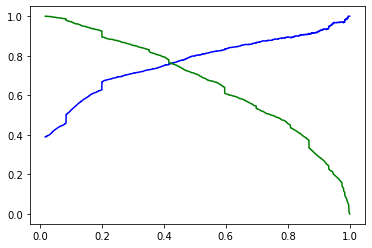

In [184]:
plt.plot(thresholds , fpr[:-1], 'b-')
plt.plot(thresholds, tpr[:-1] , 'g-')
plt.show()

# Predictions on Test Data Set 

In [186]:
X_test.head()

,totalvisits,total_time_spent_on_website,page_views_per_visit,lead_origin_landing_page_submission,lead_origin_lead_add_form,lead_origin_lead_import,lead_origin_quick_add_form,lead_source_facebook,lead_source_google,lead_source_olark_chat,...,last_notable_activity_form_submitted_on_website,last_notable_activity_had_a_phone_conversation,last_notable_activity_modified,last_notable_activity_olark_chat_conversation,last_notable_activity_page_visited_on_website,last_notable_activity_resubscribed_to_emails,last_notable_activity_sms_sent,last_notable_activity_unreachable,last_notable_activity_unsubscribed,last_notable_activity_view_in_browser_link_clicked
7628,0.0,0.000000,0.00,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
823,0.3,0.042694,0.50,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
8660,0.0,0.000000,0.00,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
8641,0.0,0.000000,0.00,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6598,0.3,0.517606,0.25,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [194]:
X_test = X_test[col5]

In [195]:
X_test_sm = sm.add_constant(X_test)

# X_test_sm = X_test_sm.reshape[:-1]

# Predictions


y_test_pred = result.predict(X_test_sm)

y_test_pred.head()

7628    0.084458
823     0.039483
8660    0.084458
8641    0.979904
6598    0.771803
dtype: float64

In [200]:
y_test_pred_Probs = pd.DataFrame(y_test_pred)

In [201]:
y_test_pred_Probs.head()

,0
7628,0.084458
823,0.039483
8660,0.084458
8641,0.979904
6598,0.771803


In [202]:
y_test_actual = pd.DataFrame(y_test)

In [203]:
y_test_actual.head()

,converted
7628,0
823,0
8660,0
8641,1
6598,0


In [204]:
# Adding column in y_test DF 

y_test_actual['Customer Id'] = y_test_actual.index

In [206]:
y_test_pred_Probs.reset_index(drop=True , inplace= True)
y_test_actual.reset_index(drop=True , inplace= True)

In [210]:
# Merging DataFrames 


y_test_pred_final = pd.concat([y_test_pred_Probs , y_test_actual ], axis =1 )

In [211]:
y_test_pred_final.head()

,0,converted,Customer Id
0,0.084458,0,7628
1,0.039483,0,823
2,0.084458,0,8660
3,0.979904,1,8641
4,0.771803,0,6598


In [212]:
y_test_pred_final = y_test_pred_final.rename(columns = {0 : 'test_probs'})

In [213]:
y_test_pred_final.head()

,test_probs,converted,Customer Id
0,0.084458,0,7628
1,0.039483,0,823
2,0.084458,0,8660
3,0.979904,1,8641
4,0.771803,0,6598


In [214]:
y_test_pred_final['final_pred'] = y_test_pred_final.test_probs.map(lambda x: 1 if x>0.37 else 0)

In [215]:
y_test_pred_final.head()

,test_probs,converted,Customer Id,final_pred
0,0.084458,0,7628,0
1,0.039483,0,823,0
2,0.084458,0,8660,0
3,0.979904,1,8641,1
4,0.771803,0,6598,1


In [216]:
y_test_pred_final['Leads'] = y_test_pred_final.test_probs.map(lambda x: round(x*100))

In [218]:
y_test_pred_final.head()

,test_probs,converted,Customer Id,final_pred,Leads
0,0.084458,0,7628,0,8
1,0.039483,0,823,0,4
2,0.084458,0,8660,0,8
3,0.979904,1,8641,1,98
4,0.771803,0,6598,1,77


In [219]:
# Checking for counts which are converted according to final prediction

y_test_pred_final.loc[y_test_pred_final['converted'] == 1 , ['final_pred']].value_counts(normalize = True)

final_pred
1             0.778119
0             0.221881
dtype: float64

## As we can infer that around 77.8% of data is correctly predicted as Converted , by which we can say its a good model 

In [248]:
# Other metrics


acurracy_test = metrics.accuracy_score(y_test_pred_final.converted , y_test_pred_final.final_pred)
print("Acurracy::  " , acc_test)

Acurracy::   0.8053405572755418


In [221]:
con_mat2_test = metrics.confusion_matrix(y_test_pred_final.converted , y_test_pred_final.final_pred)
con_mat2_test

array([[1320,  286],
       [ 217,  761]], dtype=int64)

In [222]:
TP_t = con_mat2_test[1,1]
TN_t = con_mat2_test[0,0]
FP_t = con_mat2_test[0,1]
FN_t = con_mat2_test[1,0]


In [232]:
# We can also look at the specificity of the model 

spec_test = TN_t/float(TN_t + FP_t)
print("Specificity::  " , spec_test)

Specificity::   0.821917808219178


In [233]:
# We can also look at the sensitivity of the model 

sens_test = TP_t/float(TP_t + FN_t)
print("Sensitivity::  ", sens_test)

Sensitivity::   0.778118609406953


In [225]:
# True Positive Rate 

print('True Positive Rate ::')

TP_t/float(TP_t + FP_t)

True Positive Rate ::


0.7268385864374403

In [226]:
# True Negative Rate 

print('True Negative Rate ::')

TN_t/float(TN_t + FN_t)

True Negative Rate ::


0.8588158750813273

In [252]:
# Finding recall and precision using libaries

prec_test =  precision_score(y_test_pred_final.converted , y_test_pred_final.final_pred)

recall_test = recall_score(y_test_pred_final.converted , y_test_pred_final.final_pred)

print("Precision:: " , prec_test)

print("Recall:: " , recall_test)

Precision::  0.7268385864374403
Recall::  0.778118609406953


## Precision And Recall Tradeoff

In [229]:
fpr , tpr , thresholds = precision_recall_curve(y_test_pred_final.converted , y_test_pred_final.test_probs)

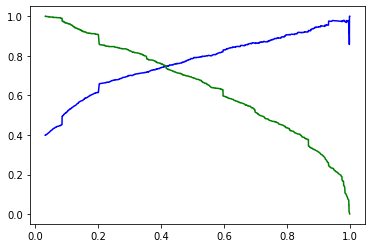

In [230]:
plt.plot(thresholds , fpr[:-1], 'b-')
plt.plot(thresholds, tpr[:-1] , 'g-')
plt.show()

In [253]:
# Comparsion between Test and Train Data set Metrics ::
        
print("Train Dataset Metrics for Optimal Cutoff of 0.37")
print("Train Accuracy :    " , acurracy_train)
print("Train Sensitivity:  " , sens_train)
print("Train_specitficity: " , spec_train)
print("Train Precision:    " , prec_train)
print("Train Recall:       " , recall_train)

print()
print("*"*60)
print()


print("Test Dataset Metrics for Optimal Cutoff of 0.37")
print("Test Accuracy :    " , acurracy_test)
print("Test Sensitivity:  " , sens_test)
print("Test specitficity: " , spec_test)
print("Test Precision:    " , prec_test)
print("Test Recall:       " , recall_test)


Train Dataset Metrics for Optimal Cutoff of 0.37
Train Accuracy :     0.8163265306122449
Train Sensitivity:   0.8054474708171206
Train_specitficity:  0.8231017770597738
Train Precision:     0.7392857142857143
Train Recall:        0.8054474708171206

************************************************************

Test Dataset Metrics for Optimal Cutoff of 0.37
Test Accuracy :     0.8053405572755418
Test Sensitivity:   0.778118609406953
Test specitficity:  0.821917808219178
Test Precision:     0.7268385864374403
Test Recall:        0.778118609406953


# Conclusion

#### From the model it can be concluded that following features make most impact :
    
1. Total number of visits 
2. Total time spend on the website
3. Lead Source as Welingak Website
4. Lead Origin as Landing page submission 
5. Email sent
6. Current Occupation as Working Professional
7. Last Notable Activity as -- 
    > Phone Conversation
    
    > Sms sent
    
    > Chat Conversation